# NLP (TEXT 분석)

## 학습내용
- 데이터 : [kaggle nlp data download](https://www.kaggle.com/c/nlp-getting-started/data)
- 머신러닝 (CountVector)
- 딥러닝 (LSTM)

In [3]:
# 구글드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import numpy as np
import pandas as pd 

In [5]:
path = 'drive/My Drive/Colab Notebooks/youtube/agileML/text/'

train = pd.read_csv(path + "data/train.csv")
test = pd.read_csv(path + "data/test.csv")

In [6]:
train.shape, test.shape

((7613, 5), (3263, 4))

In [7]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [8]:
train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [9]:
test.isnull().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

## Data Split

In [10]:
from sklearn.model_selection import train_test_split

train_text = train['text']
target = train["target"]

x_train, x_test, y_train, y_test = train_test_split(train_text, target, test_size = 0.2, random_state = 0)

In [11]:
x_train.shape, x_test.shape

((6090,), (1523,))

## ML Model

In [13]:
from sklearn import feature_extraction, linear_model, model_selection, preprocessing

In [14]:
count_vectorizer = feature_extraction.text.CountVectorizer()

In [15]:
train_vectors = count_vectorizer.fit_transform(x_train)
test_vectors = count_vectorizer.transform(x_test)

In [16]:
clf = linear_model.RidgeClassifier()

In [17]:
clf.fit(train_vectors, y_train)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=None,
                solver='auto', tol=0.001)

In [18]:
pred = clf.predict(test_vectors)

In [19]:
from sklearn.metrics import accuracy_score
round(accuracy_score(pred, y_test) * 100, 2)

79.38

## DL Model

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, GlobalAveragePooling1D

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence

In [21]:
# https://www.tensorflow.org/tutorials/keras/text_classification?hl=ko

In [22]:
vocab_size = 10000
embedding_dim = 16
max_length = 256
trunc_type='post'
oov_tok = "<OOV>"  # Out Of Vocabulary(OOV)

In [23]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_text)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(x_train)
test_sequences = tokenizer.texts_to_sequences(x_test)

In [24]:
train_padded = sequence.pad_sequences(train_sequences,maxlen=max_length, truncating=trunc_type)
test_padded = sequence.pad_sequences(test_sequences,maxlen=max_length, truncating=trunc_type)

In [25]:
len(train_padded[0]), len(test_padded[0]) 

(256, 256)

In [26]:
model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    GlobalAveragePooling1D(),
    Dense(14, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 256, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 14)                238       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 15        
Total params: 160,253
Trainable params: 160,253
Non-trainable params: 0
_________________________________________________________________


In [27]:
num_epochs = 11
history = model.fit(train_padded, y_train, epochs=num_epochs, validation_data=(test_padded, y_test))

Epoch 1/11
191/191 [==============================] - 1s 4ms/step - loss: 0.6860 - accuracy: 0.5632 - val_loss: 0.6790 - val_accuracy: 0.5817
Epoch 2/11
191/191 [==============================] - 1s 4ms/step - loss: 0.6820 - accuracy: 0.5675 - val_loss: 0.6757 - val_accuracy: 0.5817
Epoch 3/11
191/191 [==============================] - 1s 4ms/step - loss: 0.6762 - accuracy: 0.5675 - val_loss: 0.6686 - val_accuracy: 0.5817
Epoch 4/11
191/191 [==============================] - 1s 4ms/step - loss: 0.6553 - accuracy: 0.5901 - val_loss: 0.6315 - val_accuracy: 0.6054
Epoch 5/11
191/191 [==============================] - 1s 4ms/step - loss: 0.6075 - accuracy: 0.7062 - val_loss: 0.5793 - val_accuracy: 0.7275
Epoch 6/11
191/191 [==============================] - 1s 4ms/step - loss: 0.5465 - accuracy: 0.7657 - val_loss: 0.5305 - val_accuracy: 0.7676
Epoch 7/11
191/191 [==============================] - 1s 4ms/step - loss: 0.4938 - accuracy: 0.7921 - val_loss: 0.4995 - val_accuracy: 0.7741
Epoch 

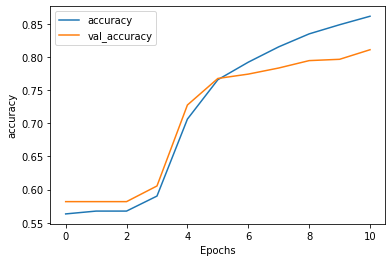

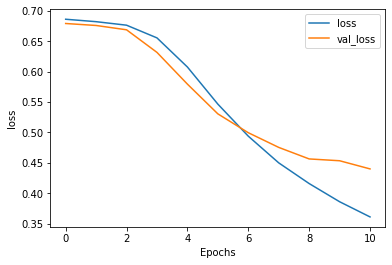

In [28]:
import matplotlib.pyplot as plt

def plot(history,string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
plot(history, "accuracy")
plot(history, 'loss')